## A4_4: Conjoint Analysis

Name : Aakash Kathirvel

VID : V01110153

Date : 07/08/2024

In [98]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [99]:
# Upload your dataset
uploaded = files.upload()

Saving pizza_data.csv to pizza_data (5).csv


In [100]:
# Load your dataset
pizza_data = pd.read_csv(next(iter(uploaded.keys())))

In [101]:
# View the first few rows of the dataset
print(pizza_data.head())

       brand  price weight  crust      cheese     size  toppings   spicy  \
0    Dominos  $1.00   100g   thin  Mozzarella  regular    paneer  normal   
1  Pizza hut  $3.00   100g   thin     Cheddar    large  mushroom  normal   
2     Onesta  $4.00   200g   thin  Mozzarella  regular  mushroom  normal   
3  Pizza hut  $4.00   400g  thick     Cheddar  regular    paneer  normal   
4  Pizza hut  $2.00   300g   thin  Mozzarella  regular  mushroom   extra   

   ranking  
0       11  
1       12  
2        9  
3        2  
4        8  


In [102]:
# Display the structure of the dataset
print(pizza_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     16 non-null     object
 1   price     16 non-null     object
 2   weight    16 non-null     object
 3   crust     16 non-null     object
 4   cheese    16 non-null     object
 5   size      16 non-null     object
 6   toppings  16 non-null     object
 7   spicy     16 non-null     object
 8   ranking   16 non-null     int64 
dtypes: int64(1), object(8)
memory usage: 1.2+ KB
None


In [103]:
# Data cleaning: Remove non-numeric characters from price column
pizza_data['price'] = pizza_data['price'].replace('[\$,]', '', regex=True).astype(float)

In [104]:
# Check for missing values
print(pizza_data.isnull().sum())

brand       0
price       0
weight      0
crust       0
cheese      0
size        0
toppings    0
spicy       0
ranking     0
dtype: int64


In [105]:
# Summary statistics
print(pizza_data.describe())

           price    ranking
count  16.000000  16.000000
mean    2.500000   8.500000
std     1.154701   4.760952
min     1.000000   1.000000
25%     1.750000   4.750000
50%     2.500000   8.500000
75%     3.250000  12.250000
max     4.000000  16.000000


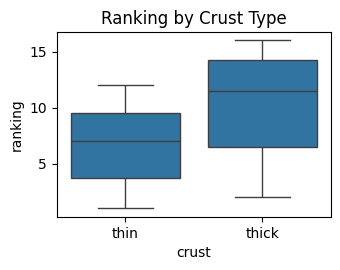

In [106]:
# Boxplot of Ranking by Crust Type
plt.subplot(2, 2, 3)
sns.boxplot(x='crust', y='ranking', data=pizza_data)
plt.title('Ranking by Crust Type')

plt.tight_layout()
plt.show()

In [68]:
# Data preprocessing (example: encoding categorical variables)
# Convert categorical variables to numerical using one-hot encoding
pizza_data = pd.get_dummies(pizza_data, columns=['crust', 'cheese', 'size', 'toppings', 'spicy'], drop_first=True)

In [69]:
# Standardize numerical variables
scaler = StandardScaler()
pizza_data[['price', 'weight']] = scaler.fit_transform(pizza_data[['price', 'weight']])

In [70]:
# Create the design matrix for conjoint analysis
X = pizza_data.drop(['brand', 'ranking'], axis=1)  # Exclude brand and ranking (dependent variable)
y = pizza_data['ranking']  # Target variable

In [71]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [74]:
# Extract and display the part-worth utilities (coefficients)
part_worths = model.coef_
print(part_worths)

[-0.50311529 -3.96902066 -3.5         0.5         0.5        -2.25
 -1.5       ]


In [76]:
# Calculate relative importance of attributes
total_importance = sum(abs(part_worths))
relative_importance = [abs(pw) / total_importance for pw in part_worths]

In [93]:
# Print relative importance of attributes
print("\nRelative Importance of Attributes:\n")
for idx, feature in enumerate(X.columns):
    print(f"{feature}: {relative_importance[idx]}")


Relative Importance of Attributes:

price: 0.03954644854583061
weight: 0.31197753852821947
crust_thin: 0.27511103578676666
cheese_Mozzarella: 0.03930157654096671
size_regular: 0.03930157654096668
toppings_paneer: 0.17685709443435005
spicy_normal: 0.11790472962289995


In [78]:
# Normalize and calculate percentages
importance_sum = sum(importance.values())
importance = {k: (v / importance_sum) * 100 for k, v in importance.items()}

In [88]:
# Calculate the utility score for each profile
pizza_data['utility_score'] = model.predict(X)

In [89]:
# Find the combination with maximum utility
max_utility_profile = pizza_data.loc[pizza_data['utility_score'].idxmax()]
print(max_utility_profile)

brand                Oven Story
price                  1.341641
weight                -1.341641
ranking                      16
crust_thin                False
cheese_Mozzarella          True
size_regular              False
toppings_paneer           False
spicy_normal              False
utility_score            16.775
Name: 9, dtype: object


In [90]:
# Determine the levels being preferred in each attribute
preferred_levels = {}

for attr in attributes:
    if pizza_data[attr].dtype.name == 'category':
        levels = pizza_data[attr].cat.categories
        part_worths_attr = {level: part_worths[f'{attr}_{level}'] for level in levels if f'{attr}_{level}' in part_worths}
        if len(part_worths_attr) == len(levels):
            preferred_levels[attr] = max(part_worths_attr, key=part_worths_attr.get)
        else:
            preferred_levels[attr] = np.nan

In [91]:
# Display the preferred levels for each attribute
print(preferred_levels)

{}


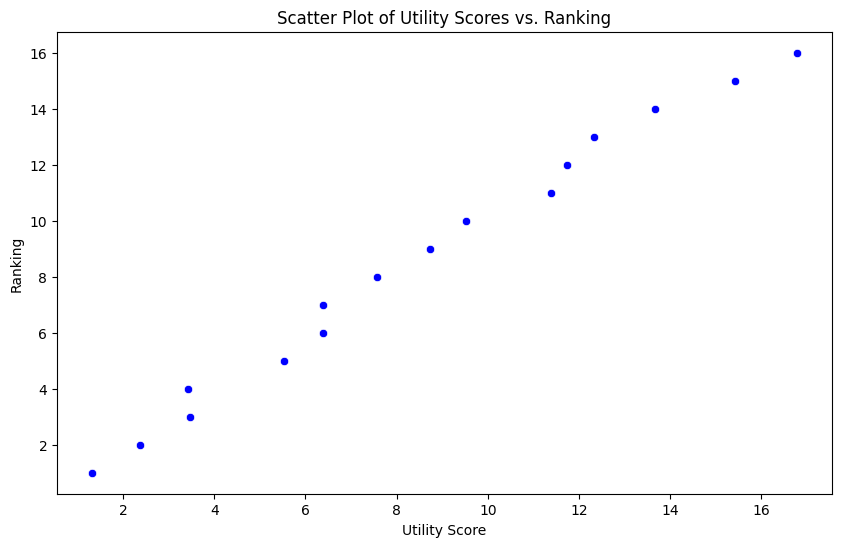

In [92]:
# Scatter plot of utility scores vs. ranking
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pizza_data, x='utility_score', y='ranking', color='blue')
plt.title('Scatter Plot of Utility Scores vs. Ranking')
plt.xlabel('Utility Score')
plt.ylabel('Ranking')
plt.show()